# Project: Investigate the 'No-Show Appointments Dataset'

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The **Medical No Show Appointments** dataset is a collection of data about patients living in the city of Vitória, capital of the Brazilian state of Espírito Santo. The dataset has been collected in order to investigate the problem of patients who schedule appointments with doctors, but then don't show up the day of the appointment. The phenomenon of patient no-shows is quite large reguarding, as we  can see soon, about 20% of the total number of patients in the dataset. Such a drop out of patients has clearly consequences on the cost of the health system and over a better planning of human and material resources use.<br>
The main purpose of this investigation is to understand which are the main characteristics of patients not going to the appointment using descriptive statistics methods. 
<br>Due to the nature of the investigation itself it is impossible to draw any definitive conclusion because as everyone knows "correlation is not causation", but despite the limits of the investigation, these are the questions we are going to find an answer to (the dipendent variable is **proportion of patient not showing up**): 
<ul>
<li> <a href='#howmany'>Question 1: How many patients are no-shows? </a></li>
<li> <a href='#gender'>Question 2: Are there any differences in the number of male and female no-shows?</a></li>
<li> <a href='#waitingTime'>Question 3: What is the average waiting time for patients and is it different for no-show cases?</a></li>
<li> <a href='#daysOfWeek'>Question 4: Are there days of week with more patient no-shows?</a></li>
<li> <a href='#ageCategory'>Question 5: Different age categories corresponds to different proportions of no-shows?</a></li>
<li> <a href='#conditions'>Question 6: Patients with conditions such as diabetes, alcoholism, handicap or blood pressure problems tend to show up more or less on appointments?</a></li>
<li> <a href='#scholarship'>Question 7:Patients who have state aid for health(the so called 'Bolsa Familia' scholarship) do show up more or less on appointments?</a></li>
</ul>

In [280]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime 
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [281]:
#loading data
filename = "noshowappointments-kagglev2-may-2016.csv"
df = pd.read_csv(filename)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [282]:
#let's see the data type of the column and if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [283]:
#summary statistics for the columns
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



According to the original data source on Kaggle these are the meaning of the different columns: <br>
#### Original Columns
<ul>
<li>**PatientId** : id for the patient </li>
<li>**AppointmentId** : id for the appointemnt </li>
<li>**Gender** : F for females M for males </li>
<li>**ScheduledDay** : The day the appointment is scheduled in UTC format, this date includes also hour, minutes and seconds</li>
<li>**AppointmentDay** : The day the appointment happens, the hour is the same for all the appointments and it is at the beginning of the day, hour 00:00:00 </li>
<li>**Age**: the age of the patient in years
<li>**Neighbourhood**: one of the 80 areas of the capital Vitória, plus the area denominated ILHAS OCEÂNICAS DE TRINDADE that are islands 1100 km far from Vitória and that are considered a military zone. </li>
<li>**Scholarship**: a value of 1 indicates the patient is enrolled in the social welfare program denominated Bolsa Família who provide financial aid for poor families, 0 indicates the patient isn't in the Bolsa Família program. More on Bolsa Familia here: https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia </li>
<li>**Hipertension**: 1 for patient with hypertension (high blood pressure), 0 if the patient doens't have hypertension.</li>
<li>**Diabetes**: 1 if the patient is diabetic, 0 if not. </li>
<li>**Alcoholism**: 1 for if the patient is alcoholist, 0 if not. </li>
<li>**Handcap**: a value ranging from 1 to 4 indicates the patient has an handicap, 0 indicates no handicap.</li>
<li>**SMS_received**: a value of 1 indicates the patient received 1 or more sms remaninding of the appointment, 0 indicates the patient didn't receive any sms. </li>
<li>**No-Shows**: a value of **No** indicates the patient isn't a no-show, so it showed up on the appointment. A value of **Yes** indicates the patiens is a no-show.</li>

The columns above are the original ones in the dataset. After some data cleaning, I'm going to add 3 more columns to the dataset, in order to investigate better the data and that I list here for convenience and for reference:
#### Added columns
<ul>
<li>**WaitingTimeDays**: the number of days passed between the scheduling day and the day of the appointment, 0 if the scheduling day and the appointment day are the same. </li>
<li>**AgeCategory**: 1 of 10 category of ages, every category includes 10 years of age, for example '10-19' is the value for patients with age between 10 and 19 years, with extremes included, the last category '90 plus' includes all the years of age above or equal to 90. </li>
<li>**DayOfWeek**: the day of the week the appointment should take place.</li>


#### Changed Columns
**NoShow**:In the data cleaning section I'm going to change the name and the values of the No-Shows columns: it will be renamed to NoShows in order to be a valid python name and it will contain **boolean** instead of strings: True for no-shows, False otherwise.

### Data Cleaning 

#### Converting columns with date strings  to datetime 
As shown by the descibe function above, the dataset has no null value, but there are some elements to fix: first of all the dates are strings, but to perform computations is better to work with datetime objects. So I'm going to convert the ScheduledDay and the AppointmentDay to datetime objects.


In [284]:
#converting date string to datetime objects
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [285]:
#let's confirm datetype is changed
df.ScheduledDay.dtype

dtype('<M8[ns]')

In [286]:
df.AppointmentDay.dtype

dtype('<M8[ns]')

In [287]:
# summary statistics about the day the appointment is set up
df.ScheduledDay.describe()

count                  110527
unique                 103549
top       2016-05-06 07:09:54
freq                       24
first     2015-11-10 07:13:56
last      2016-06-08 20:07:23
Name: ScheduledDay, dtype: object

In [288]:
# summary statistics about the day of the appointment
df.AppointmentDay.describe()

count                  110527
unique                     27
top       2016-06-06 00:00:00
freq                     4692
first     2016-04-29 00:00:00
last      2016-06-08 00:00:00
Name: AppointmentDay, dtype: object

All the appointments are scheduled between  10th November, 2015 and 8th June, 2016. <br>
The appointments took place (or should have taken place) between 29th April, 2016 and 8th June, 2016.

#### Adding the WaitingTimeDays column
As illustrated above the ScheduledDay column, which indicates the day the appointment is set up, includes hours, minutes and seconds that are generally different for every row in the dataset, but instead the appointment column doesn't have reliable values for the hour, minutes and seconds, they are all 00:00:00 which is clearly only a default hour. Calculting the waiting time considering the hours doesn't make sense in this case, so I'm going to calculate the waiting time only considering days of difference between the date in the AppointmentDay column and the ScheduledDay column.

In [289]:
#adding the WaitingTimeDays column to the dataframe
df['WaitingTimeDays'] = ( df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date).dt.days
 # summary description of waiting time days
df.WaitingTimeDays.describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingTimeDays, dtype: float64

#### Dropping rows with negative values for WaitingTimeDays
It seems some of the values in our new column WaitingTimeDays are negatives, let's see how many negative value there are.

In [290]:
negative_days = df[df['WaitingTimeDays'] < 0]
negative_days.shape

(5, 15)

In [291]:
negative_days

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingTimeDays
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


There are only 5 rows with negative values for WaitingTimeDays, I'm going to drop those rows for which the day of the appointment is before the day of the scheduling, clearly an error in the dataset.

In [292]:
#drop days with negative waiting time
negative_days_mask =df['WaitingTimeDays'] < 0
df.drop(df.loc[negative_days_mask].index, inplace = True)

In [293]:
## we had 110527 rows before, let's see if the negative values has been removed
df.shape

(110522, 15)

In [294]:
df.WaitingTimeDays.describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingTimeDays, dtype: float64

#### Adding columns for week of the day

In [295]:
# create a column for the day of the week of the appointment day, the day ranges from 0 for Monday to 6 for Sunday
df['DayOfWeek'] = df.AppointmentDay.dt.weekday

In [296]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WaitingTimeDays,DayOfWeek
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,4


#### Removing negative values from the Age column
Let's look more closely to the Age column

In [297]:
df.Age.describe()

count    110522.000000
mean         37.089041
std          23.110064
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

There are some negative values for Age, let'see how many they are

In [298]:
df_negative_ages = df[df['Age'] < 0]
df_negative_ages.shape

(1, 16)

In [299]:
df.shape

(110522, 16)

There is only one negative value and I'm going to remove this row from the dataset

In [300]:
#removing the row with negative value in the Age column
df.drop(df.loc[df['Age'] < 0].index, inplace = True)
df.shape

(110521, 16)

#### Changing the name of the No-show column to NoShow and changing the data type to boolean
I'm going to change the name of the column, so it doens't contain the '-' character and to convert the data type to boolean, more useful for computation, so in the end No will be converted to False (it is false the patient didn't show up) and Yes will be converted to True (the patient is a no-show).

In [301]:
#rename column No-show to a valid python name
df.rename(columns= {'No-show': 'NoShow'}, inplace = True)

In [302]:
#change the values of the NoShow column to boolean
df.NoShow.replace(to_replace={'No': False, 'Yes':True}, inplace= True)

In [303]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,WaitingTimeDays,DayOfWeek
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,False,0,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,False,0,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,False,0,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,False,0,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,False,0,4


In [304]:
#check the NoShow column has changed to boolean
df.NoShow[0].dtype

dtype('bool')

#### Adding the AgeCategory column
I'm going to add an AgeCategory column in order to consider patients by group of ages: each group consists of 10 years and last group '90 plus' consists of all the age equal or above 90, as follows:<br>
<ul>
<li> 0 -9 </li>
<li> 10-19 </li>
<li> 20-29 </li>
<li> 30-39 </li>
<li> 40-49 </li>
<li> 50-59 </li>
<li> 60-69 </li>
<li> 70-79 </li>
<li> 80-89 </li>
<li> >= 90 (90 plus) </li>
</ul>

In [305]:
def classify_age(age):
    """
    Return the age group an age belong to
    
    Args:
     age(int): an age as integer
     
     Returns:
     an age group as string
    
    """
    if age >= 90:
        return '90 plus'
    elif age >= 80:
        return '80-89'
    elif age >= 70:
        return '70-79'
    elif age >= 60:
        return '60-69'
    elif age >= 50:
        return '50-59'
    elif age >= 40:
        return '40-49'
    elif age >= 30:
        return '30-39'
    elif age >= 20: 
        return '20-29'
    elif age >= 10:
        return '10-19'
    else:
        return '0-9'

In [306]:
#create the column with the apply function
df['AgeCategory'] = df['Age'].apply(classify_age)

<a id='eda'></a>
## Exploratory Data Analysis
Now that the dataframe has been cleaned and preperad, let's find answers to our questions.

<a id='howmany'></a>
### Question 1: How many patients are no-shows?

In [307]:
#dataframe for no-show patients
df_no_show = df[df['NoShow'] == True]
#dataframe for show-patients
df_show =df[df['NoShow'] == False]
#proportion of no-show patients
not_showing_proportion = df_no_show.shape[0]/df.shape[0]
not_showing_proportion

0.2018982817745044

In [308]:
showing_proportion =  df_show.shape[0]/df.shape[0]
showing_proportion

0.7981017182254956

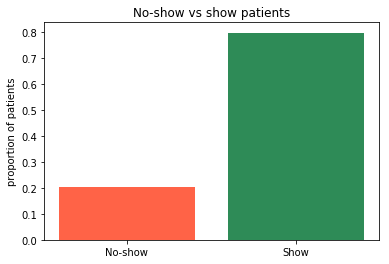

In [309]:
#displaying proportion of patients showing and not showing
no_show_vs_show = [not_showing_proportion, showing_proportion]
labels = ['No-show', 'Show']
plt.title('No-show vs show patients')
plt.ylabel('proportion of patients')
plt.bar(labels, np.array(no_show_vs_show), color = ['tomato','seagreen' ]);


About 20% of patients (proportion 0.2) don't show up on appointment in the entire dataset.

<a id='gender'></a>
### Question 2: Are there any differences in the number of male and female no-shows?

Let's first see how many males and females there are in our dataset.

In [310]:
#create the females dataframe
df_females = df[df['Gender'] == 'F']
#proportion of females in the dataset
df_females.shape[0]/df.shape[0]

0.6499760226563278

In [311]:
#create the males dataframe
df_males = df[df['Gender'] == 'M']
#proportion of females in the dataset
df_males.shape[0]/df.shape[0]

0.35002397734367224

Females are the vast majority in the entire dataset, being as much as 65%, so it is very likely they are also the majority, as absolute numbers, in the no_show dataframe, let's see if this is true.

In [312]:
df_no_show.groupby(['Gender', 'NoShow'])['PatientId'].count()

Gender  NoShow
F       True      14591
M       True       7723
Name: PatientId, dtype: int64

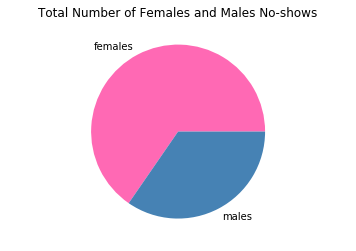

In [313]:
no_show_gender_count = df_no_show.groupby(['Gender', 'NoShow'])['PatientId'].count()
fig1, ax1 = plt.subplots();
ax1.axis('equal')
ax1.pie(no_show_gender_count, labels = ['females', 'males'], colors=['hotpink', 'steelblue']);
plt.title('Total Number of Females and Males No-shows')
plt.show()

Females are, as expected the vast majority of the total number of no-shows, but to answer our initial question is better to consider the proportion of no-shows for each gender, in order to understand if there is really a difference for genders in not showing.

In [314]:
#proportion of not showing males
not_showing_males = df_males[df_males['NoShow'] == True]
not_showing_males_proportion = not_showing_males.shape[0] /df_males.shape[0]
not_showing_males_proportion

0.19963810262375598

In [315]:
#proportion of not showing females
#proportion of not showing males
not_showing_females = df_females[df_females['NoShow'] == True]
not_showing_females_proportion = not_showing_females.shape[0] /df_females.shape[0]
not_showing_females_proportion

0.2031154295896208

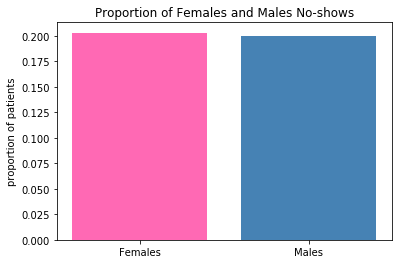

In [316]:
#displaying proportion of patients showing and not showing
noshowF_noshowM = [not_showing_females_proportion, not_showing_males_proportion]
labels_f_m = ['Females', 'Males']
plt.title('Proportion of Females and Males No-shows')
plt.ylabel('proportion of patients')
plt.bar(labels_f_m, np.array(noshowF_noshowM), color=['hotpink', 'steelblue']);

Females and males proportion of no-shows are very similar, around 0.2 corresponding to a 20% percentage of no-shows, and perfectly in line withe entire dataset, so in general females don't drop appointments more than males, despite being the largest group in total number of patients between no-shows.

<a id='waitingTime'></a>
### Question 3: What is the average waiting time for patients and is it different for no-show cases?

Let's first see if waiting time in days differs between no-shows and patiens who go to the appointment and respect to the entire dataset.

In [317]:
# mean waiting time in days
df.WaitingTimeDays.mean()

10.184345056595578

On average a patient waits about 10 ten days for an appointment

In [318]:
#mean waiting time for no-shows
df_no_show.WaitingTimeDays.mean()

15.835484449224701

In [319]:
#mean waiting time for patients who go to the appointment
df_show.WaitingTimeDays.mean()

8.754758692620767

In [320]:
df.WaitingTimeDays.describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingTimeDays, dtype: float64

No-show patients wait on average about 16 days (rounding to the nearest integer), while the average for the dataset is 10 days. Patients who show on the appointment wait instead less than average, about 9 days.<br>
The minimum value of waiting time is 0 days (the appointment is on the same day of the scheduling day), while the maximum is very high: 179 days. <br>The majority of patients wait less than 15 days(75%).<br>
Let's now see how waiting times are distributed for no-shows and patients who show on appointment, considering as maximum waiting time 60 days, because only a tiny fraction of patients wait more than that time,as we can see below:

In [321]:
df[df['WaitingTimeDays'] <= 30].shape[0] /df.shape[0]

0.9060992933469657

In [322]:
df[df['WaitingTimeDays'] < 60].shape[0] /df.shape[0]

0.9803838184598402

90% of patients wait less than or equal to 30 days  and 98% of patient wait less than 60 days.

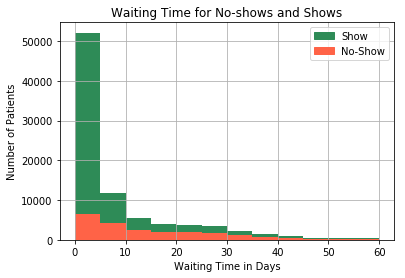

In [323]:
#plotting distribution of waiting time for no-shows and patients who show up on appointments
import matplotlib.patches as mpatches
show_color = mpatches.Patch(color='seagreen', label='Show')
no_show_color = mpatches.Patch(color='tomato', label='No-Show')
plt.title('Waiting Time for No-shows and Shows')
plt.xlabel('Waiting Time in Days')
plt.ylabel('Number of Patients')
df_show['WaitingTimeDays'].hist(color='seagreen', range=(0,60), bins=12);
df_no_show['WaitingTimeDays'].hist(color='tomato', range=(0,60), bins= 12);
plt.legend(handles=[show_color, no_show_color]);
plt.show()



The distribution of appointment for both no-shows and patients who show up on appointments is skewed to the right, with a mode in the first 5 days, while there are progressively less patients for longer waiting times.<br>
Let's now see in more details the proportion of patients not showing up in the first 30 days, considering so a data that is independent of the number of patients for each day.

In [324]:
#calculating the no-show proportion of patients for the first 30 days of waiting time
df_30 = df.query("WaitingTimeDays <= 30")
df_30_no_show = df_no_show.query("WaitingTimeDays <= 30")
days30_total_by_day = df_30.groupby('WaitingTimeDays')['PatientId'].count()
days30_no_show_total_by_day = df_30_no_show.groupby('WaitingTimeDays')['PatientId'].count()
#proportion of not showing patient grouped by waiting time in days
days30_no_show_proportion = days30_no_show_total_by_day / days30_total_by_day

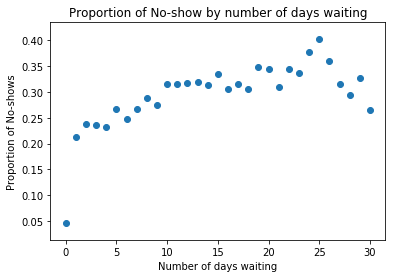

In [325]:
#plottin the proportion of no-shows by days of waiting 
days = [x for x in range(31)]
plt.title('Proportion of No-show by number of days waiting')
plt.xlabel('Number of days waiting')
plt.ylabel('Proportion of No-shows')
plt.scatter(days, days30_no_show_proportion);

In [326]:
#index of the day with the maximum proportion of no-shows
days30_no_show_proportion.idxmax()

25

In [327]:
#maximum proportion of no-shows
days30_no_show_proportion[25]

0.40188383045525905

The notable data in the plot above is that when the waiting time is 0 (it means the AppointmentDay and ScheduledDay are the same day), the proportion of no-shows is very low, while as the waiting time increases, the proportion of no-shows increases as well, with a peak at 25 days, where there is a local maximum with a proportion of no-shows of 0.40 (40% of patients are no-shows).

<a id='daysOfWeek'></a>
### Question 4: Are there days of week with more patient no-shows?

In [328]:
#calculating the number of appointments per week day
appointments_per_week_day = df.groupby('DayOfWeek')['PatientId'].count()
appointments_per_week_day

DayOfWeek
0    22713
1    25638
2    25866
3    17246
4    19019
5       39
Name: PatientId, dtype: int64

In [329]:
no_shows_per_week_day = df_no_show.groupby('DayOfWeek')['PatientId'].count()
no_shows_per_week_day

DayOfWeek
0    4689
1    5150
2    5092
3    3337
4    4037
5       9
Name: PatientId, dtype: int64

All the appointments happen between Monday (0) and Saturday (5), no appointment happens on Sunday and only a few on Saturday.
The days with the greatest number of appointmetns are Tuesday(1) and Wednesday(2)

In [330]:
no_show_proportion_per_week_day = no_shows_per_week_day/appointments_per_week_day
no_show_proportion_per_week_day

DayOfWeek
0    0.206446
1    0.200874
2    0.196861
3    0.193494
4    0.212261
5    0.230769
Name: PatientId, dtype: float64

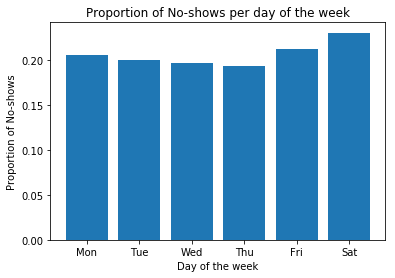

In [331]:
#plotting proportion of no shows based on week day
week_day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
plt.bar(no_show_proportion_per_week_day.index, no_show_proportion_per_week_day)
plt.xticks(no_show_proportion_per_week_day.index, week_day_names)
plt.title('Proportion of No-shows per day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Proportion of No-shows')
plt.show()

The day of the week with the greatest proportion of no-shows is Saturday(0.23), but it is also a day with a very limited number of patients, only 39 in all the dataset. <br>
The day of the week with a number of patients comparable with the other days  and with the highest proportion of no-shows is Friday, with a percentage 0.21 on a total number of patients of 19019, while Thursday is the day who has the lowest proportion of no-shows(0.19). <br>

<a id='ageCategory'></a>
### Question 5: Different age categories corresponds to different proportions of no-shows?

Let's now see if different age categories show different proportions of no-shows. 

In [332]:
#group patients by age category
patients_by_age = df.groupby('AgeCategory')['PatientId'].count()
patients_by_age

AgeCategory
0-9        17474
10-19      12935
20-29      13698
30-39      15170
40-49      14209
50-59      15863
60-69      11876
70-79       5934
80-89       2945
90 plus      417
Name: PatientId, dtype: int64

In [333]:
#group no-shows by age category
no_shows_by_age = df_no_show.groupby('AgeCategory')['PatientId'].count()
no_shows_by_age

AgeCategory
0-9        3483
10-19      3256
20-29      3379
30-39      3299
40-49      2880
50-59      2776
60-69      1790
70-79       902
80-89       464
90 plus      85
Name: PatientId, dtype: int64

In [334]:
#proportion of no-shows by age category
no_show_proportion_by_age = no_shows_by_age/patients_by_age
no_show_proportion_by_age

AgeCategory
0-9        0.199325
10-19      0.251720
20-29      0.246678
30-39      0.217469
40-49      0.202688
50-59      0.174998
60-69      0.150724
70-79      0.152005
80-89      0.157555
90 plus    0.203837
Name: PatientId, dtype: float64

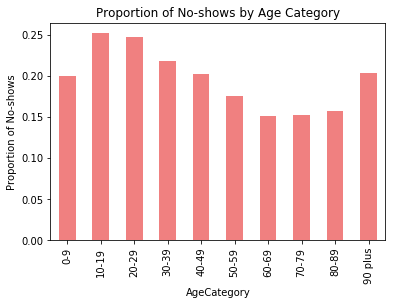

In [335]:
plt.title('Proportion of No-shows by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Proportion of No-shows')
no_show_proportion_by_age.plot.bar(color='lightcoral');

It seems different age categories really have differences in the proportion of no-shows: the category with the highest proportion of no shows is the one between 10 and 19 years (0.252), followed by the one between 20 and 29 (0.247), so overall patients aged between 10 and 29 years show the highest proportion of no shows of all the dataset. <br>
On the contrary patients aged between 60 and 69 years have the lowest proportion of no-shows (0.15) and overall the three lowest proportions of no-shows are in the categories between 60 and 89 years of age. <br>

For curiosity, let's now see if patients aged between 10 and 29 years wait for appointments more or less of patients aged between 60 and 89 years.

In [336]:
#dataframe for patients aged between 10 and 29 years
df_10_29 = df.query('Age >= 10 and Age < 30')
#mean waiting time for patients aged between 10 and 29 years
df_10_29.WaitingTimeDays.mean()

9.642436075545376

In [337]:
#dataframe for no-shows aged between 10 and 29 years
df_10_29_no_shows = df_no_show.query('Age >= 10 and Age < 30')
df_10_29_no_shows.WaitingTimeDays.mean()

14.950113036925396

In [338]:
df_60_89 =  df.query('Age >= 60 and Age < 90')
df_60_89.WaitingTimeDays.mean()

11.09453143820766

In [339]:
df_60_89_no_show = df_no_show.query('Age >= 60 and Age < 90')
df_60_89_no_show.WaitingTimeDays.mean()

16.298795944233206

In [340]:
df.WaitingTimeDays.mean()

10.184345056595578

Patients aged between 60 and 89 years of age wait on average 11 days, one day more than the average of the entire dataset (10 days), while younger patients aged between 10 and 29 years of age wait on average 10 days. For both age categories the no-shows patients wait more than the average of the dataset, 15 days for the young patients and 16 days for older patients.
So it seems that despite waiting more on average than the younger patients, older patients aged between 60 and 89 years show more on appointments. <br>

<a id='conditions'></a>
### Question 6: Patients with conditions such as diabetes, alcoholism, handicap or hypertension problems tend to show up more or less on appointments?

#### Diabetes

In [341]:
# dataframe for diabetic patients
df_diabetes = df[df['Diabetes'] == 1]
df_diabetes.shape

(7943, 17)

In [342]:
#proportion of diabetic patients
df_diabetes.shape[0]/df.shape[0]

0.07186869463721826

In [343]:
#average waiting time for diabetic patients
df_diabetes.WaitingTimeDays.mean()

8.693188971421378

In [344]:
#average age for diabetic patients
df_diabetes.Age.mean()

61.37252927105627

In [345]:
#dataframe for diabetic no-shows
no_show_diabetes = df_no_show[df_no_show['Diabetes'] == 1]
no_show_diabetes.shape

(1430, 17)

In [346]:
#proportion of no-shows for diabetic patients
diabetic_no_show_proportion = no_show_diabetes.shape[0]/df_diabetes.shape[0]
diabetic_no_show_proportion

0.18003273322422259

Patients with diabetes are about 7% of the entire dataset, their average age is 61 years and wait on average slightly less than the mean of the dataset, 9 days against 10 days for the entire dataset.<br>
The percentage of no-shows for diabetic patients is 0.18, lower than the mean of the dataset which is 0.20.

#### Alcoholism

In [347]:
# dataframe for patients with alcoholism problems
df_alcoholism = df[df['Alcoholism'] == 1]
df_alcoholism.shape

(3360, 17)

In [348]:
# proportion of patient with alcoholism
df_alcoholism.shape[0]/df.shape[0]

0.030401462165561294

In [349]:
#average age for patients with alcoholism problems
df_alcoholism.Age.mean()

49.59375

In [350]:
#average waiting time for alcholism patients
df_alcoholism.WaitingTimeDays.mean()

6.865178571428571

In [351]:
# dataframe for alcoholist no-shows
df_alcoholism_no_show = df_alcoholism[df_alcoholism['NoShow'] == True]
df_alcoholism_no_show.shape

(677, 17)

In [352]:
#proportion of alcoholist no-shows
alcoholism_no_show_proportion = df_alcoholism_no_show.shape[0]/df_alcoholism.shape[0]
alcoholism_no_show_proportion

0.20148809523809524

Patients with alcoholism problems are about 3% of the entire dataset, they are aged on average 50 years and the proportion of no-shows is similar to the one of all the dataset, they are both 0.20, but alcoholist patients wait on average less than then the mean waiting time of the dataset, 7 days against 10 of all the dataset.

#### Handicap

In [353]:
# dataframe for patients with handicap
df_handicap = df[df['Handcap'] > 0]
df_handicap.shape

(2239, 17)

In [354]:
#proportion of patients with handicap
df_handicap.shape[0]/df.shape[0]

0.02025859338949159

In [355]:
# average age for patients with handicap
df_handicap.Age.mean()

50.561411344350155

In [356]:
#average waiting time for patients with handicap
df_handicap.WaitingTimeDays.mean()

7.968736042876284

In [357]:
#dataframe for no-shows with handicap
df_handicap_no_show = df_no_show[df_no_show['Handcap'] > 0]
df_handicap_no_show.shape

(405, 17)

In [358]:
handicap_no_show_proportion = df_handicap_no_show.shape[0]/df_handicap.shape[0]
handicap_no_show_proportion

0.18088432335864224

Patients with handicap are about 2% of the dataset, they are aged on average 51 years and wait on average less than the entire dataset, 8 days against 10. The proportion of no-shows for patietns with handicap is 0.18, less than the average of the dataset

#### Hypertension

In [359]:
# dataframe for patients with hypertension
df_hypertension = df[df['Hipertension'] == 1]
df_hypertension.shape

(21801, 17)

In [360]:
#proportion of patients with hypertension
df_hypertension.shape[0]/df.shape[0]

0.19725662996172674

In [361]:
#average age for patients with hypertension
df_hypertension.Age.mean()

60.61359570661896

In [362]:
#average waiting time for patients with hypertension
df_hypertension.WaitingTimeDays.mean()

9.653914958029448

In [363]:
#dataframe for no-shows with hypertension
df_hypertension_no_show = df_no_show[df_no_show['Hipertension'] == 1]
df_hypertension_no_show.shape

(3772, 17)

In [364]:
#proportion of no-shows with hypertension
hypertension_no_show_proportion = df_hypertension_no_show.shape[0]/df_hypertension.shape[0]
hypertension_no_show_proportion

0.17301958625751113

Patients with hypertension are the largest group with a condition in the dataset, they are about 20% of the dataset. They are aged on average 61 years and wait approximately, as the mean of the dataset, 10 days, but they have a lower proportion of no-shows: 0.17 against 0.20 of all the dataset.

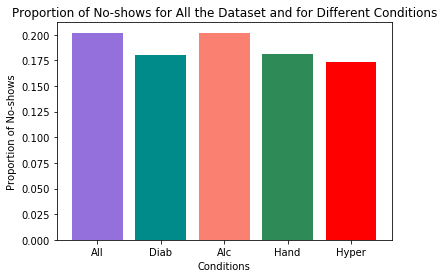

In [365]:
#plotting the proportions of no-shows for the datateset and for patients with conditions
conditions_no_shows = [not_showing_proportion, diabetic_no_show_proportion,alcoholism_no_show_proportion,
                       handicap_no_show_proportion, hypertension_no_show_proportion ]
conditions_label = ['All', 'Diab', 'Alc', 'Hand', 'Hyper']
plt.bar([1, 2, 3, 4, 5], conditions_no_shows, color=['mediumpurple', 'darkcyan', 'salmon', 'seagreen', 'red'])
plt.xticks([1, 2, 3, 4, 5], conditions_label)
plt.title('Proportion of No-shows for All the Dataset and for Different Conditions')
plt.xlabel('Conditions')
plt.ylabel('Proportion of No-shows')
plt.show()

<a id='scholarship'></a>
### Question 7:Patients who have state aid for health (the so called 'Bolsa Família' scholarship) do show up more or less on appointments?

In [366]:
#dataframe for patients in the Bolsa Familia program
df_scholarship = df[df['Scholarship'] == 1]
df_scholarship.shape

(10861, 17)

In [367]:
#proportion of patients in the Bolsa Familia program
df_scholarship.shape[0]/df.shape[0]

0.0982709168393337

In [368]:
#mean age for patients in the Bolsa Familia program
df_scholarship.Age.mean()

30.616241598379524

In [369]:
#mean waiting time for patients in the Bolsa Familia program
df_scholarship.WaitingTimeDays.mean()

8.777921001749379

In [370]:
# dataframe for no-show for patients in the Bolsa Familia program
df_scholarship_no_show = df_no_show[df_no_show['Scholarship'] == 1]
df_scholarship_no_show.shape

(2578, 17)

In [371]:
scholarship_no_show_proportion = df_scholarship_no_show.shape[0]/df_scholarship.shape[0]
scholarship_no_show_proportion

0.2373630420771568

Patients in the Bolsa Família program are nearly 10% of the dataset, their average age is 31 years and their waiting time is one day less than the entire dataset, 9 days against 10. The proportion of no-shows is higher than mean of the dataset, 0.24 against 0.20.

<a id='conclusions'></a>
## Conclusions

About 20% of all the patients in the No-Show Appointments dataset don't show on appointments.<br> On average the patients wait about 10 days between the day they schedule the appointment and the day of the appointment itself, but patients who don't show on appointmens wait more, about 16 days. <br>
When the day of the appointment is the same of the scheduling day, there is the lowest proportion of no-shows, they are only 5%, while for patients waiting 25 days there is a 40% percentage of no-shows. <br>
Female patients are the majority of the dataset, they are about 65%, while males are 35%, but considering only the proportion of no-shows for females and males, they are very similar (both around 0.20), so males and females show up on appointments the same way. <br>
The proportion of no-shows for day of the week shows that Friday and Saturday are the days where there is a slightly increase in the proportion of no-shows, 0.23 on Saturday and 0.21 on Friday, but only a few appointments are on Saturday. The day with less no-shows is instead Thursday with 0.19 (slightly less than the average of the dataset). <br>
Dividing the patients in age categories, patients between 10 and 29 years of age are the ones with the greatest no-show percentage, around 25%, while patients aged between 60 and 89 years have a percentage of no-shows much lower, about 15%. <br>
People with conditions such as diabetes, alcoholism, handicap or hyptersion in theory could have problems in showing up on appointments, but instead our analysis shows that the percentage of no-shows for these patients is lower than the average for diabetes, handicap and hypertension and equal to the mean of the dataset for alcoholism, but should be noted that patients with diabetes, handicap and alcoholism wait less than the average of the dataset, while patients with hypertension wait approximately the same of the mean of the dataset. <br>
Patients in the 'Bolsa Família' program (a state aid program for poor families) tend to have a higher percentage of no-shows respect to all the dataset: 24% against 20%, despite waiting less than the average of the dataset, 9 days on average against 10.